# Proyecto de Estadística: Coprolitos

## Inspección de los datos

Importar librerías

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

Cargar datos

In [16]:
# Load the data
df = pd.read_excel('data/NMDS Coprolitos españa_database.xlsx')

Inspeccionar primero elementos de nuestros datos

In [17]:
df.head()

,Ejemplar,# inclusiones,agujeros,líneas de corrosión,señal química,diamétro (mm),arreglo de inclusiones,forma de fracturas en terminaciones
0,1 bump headed lace,4,2.0,1.0,1.0,1,2,5.0
1,2 bump headed lace,4,2.0,2.0,1.0,1,2,3.0
2,3 circular,1,2.0,1.0,1.0,1,4,5.0
3,4 circular,3,2.0,2.0,1.0,2,4,5.0
4,5 cilíndrico,1,NaN,NaN,NaN,3,1,NaN


Notamos que los valores de la columna Ejemplar contiene texto adicional, lo eliminamos para quedarnos solo con el nombre.

In [18]:
# Función Viowi

# Definir una función que realiza la transformación...
def limpiar_columna(texto):
    # Eliminar los números
    texto_sin_numeros = re.sub(r'\d+', '', texto)
    # Eliminar espacios a la izquierda y a la derecha
    texto_limpio = texto_sin_numeros.strip()
    return texto_limpio

# Aplicar la función a la columna del DataFrame
df['Ejemplar'] = df['Ejemplar'].apply(limpiar_columna)

# Imprimir los nuevos valores de la columna Ejemplar
df['Ejemplar'].unique()


array(['bump headed lace', 'circular', 'cilíndrico', 'ciclíndrico',
       'cono', 'elipsoidal', 'elongado', 'forma de pino', 'irregular',
       'forma de rosario', 'espiral', 'forma de encaje recto',
       'encaje delgado'], dtype=object)

Notamos que existe un typo en "ciclíndrico" 

In [19]:
df.loc[df['Ejemplar'] == 'ciclíndrico', 'Ejemplar'] = 'cilíndrico';

# Imprimos nuevamente los valores de la columna
df['Ejemplar'].unique()

array(['bump headed lace', 'circular', 'cilíndrico', 'cono', 'elipsoidal',
       'elongado', 'forma de pino', 'irregular', 'forma de rosario',
       'espiral', 'forma de encaje recto', 'encaje delgado'], dtype=object)

Cambiar el nombre de las columnas

In [20]:
# Cambiar el nombre de las columnas
df = df.rename(columns={'# inclusiones': 'Numero_de_inclusiones', 'agujeros': 'Agujeros', 'líneas de corrosión': 'Lineas_de_corrosion', 'señal química': 'Señal_quimica', 'diamétro (mm)': 'Diametro_mm', 'arreglo de inclusiones' : 'Arreglo_de_inclusiones', 'forma de fracturas en terminaciones': 'Forma_de_fracturas_en_terminaciones'})

# Imprimir nuevas columnas
df.columns

Index(['Ejemplar', 'Numero_de_inclusiones', 'Agujeros', 'Lineas_de_corrosion',
       'Señal_quimica', 'Diametro_mm', 'Arreglo_de_inclusiones',
       'Forma_de_fracturas_en_terminaciones'],
      dtype='object')

**Catálogo de valores:**

*Número_de_inclusiones:* 1 <15 ; 2 = 15–30 ; 3 = 31 – 45; 4 >45

*Agujeros:* 1 – absent; 2 – light; 3 – noticeable; 4 – great

*Lineas_de_corrosion:* 1 – absent; 2 – slight; 3 – noticeable

*Señal_quimica:* 1 – light; 2 – moderate; 3 – heavy

*Diametro_mm:* 1 < 5; 2 = 5–9.9 ; 3 = 10–19.9; 4 >20

*Arreglo_de_inclusiones:* 1 – no visible; 2 – fragmented; 3 – articulated; 4 – isolated

*Forma_de_fracturas_en_terminaciones:* 1 – blunt; 2 – pinched; 3 – straight; 4 – irregular; 5 – all types 

Tipo de datos

In [21]:
df.dtypes

Ejemplar                                object
Numero_de_inclusiones                    int64
Agujeros                               float64
Lineas_de_corrosion                    float64
Señal_quimica                          float64
Diametro_mm                              int64
Arreglo_de_inclusiones                   int64
Forma_de_fracturas_en_terminaciones    float64
dtype: object

Dado que todas los valores son enteros representando categorías, convertimos los valores flotantes a enteros.

In [22]:
# Convertir las columnas especificadas a valores enteros, ignorando los valores perdidos
#columns_to_convert = ['Agujeros', 'Lineas_de_corrosion', 'Señal_quimica', 'Forma_de_fracturas_en_terminaciones']
#df[columns_to_convert] = df[columns_to_convert].apply(lambda x: pd.to_numeric(x, downcast='integer', errors='coerce'))

#df.dtypes

Inspeccionar valores faltantes

In [23]:
df.isna().sum()

Ejemplar                               0
Numero_de_inclusiones                  0
Agujeros                               4
Lineas_de_corrosion                    4
Señal_quimica                          4
Diametro_mm                            0
Arreglo_de_inclusiones                 0
Forma_de_fracturas_en_terminaciones    4
dtype: int64

Imputar valores pérdidos

In [24]:
# Extraer las filas que contienen al menos un valor perdido
df_with_missing_values = df[df.isnull().any(axis=1)]

df_with_missing_values

,Ejemplar,Numero_de_inclusiones,Agujeros,Lineas_de_corrosion,Señal_quimica,Diametro_mm,Arreglo_de_inclusiones,Forma_de_fracturas_en_terminaciones
4,cilíndrico,1,NaN,NaN,NaN,3,1,NaN
6,cilíndrico,1,NaN,NaN,NaN,3,1,NaN
13,irregular,1,NaN,NaN,NaN,4,1,NaN
17,espiral,1,NaN,NaN,NaN,1,4,NaN


In [25]:
# Imputar valores perdidos con la moda de las filas que tienen el mismo valor en 'Ejemplar'
for row in df_with_missing_values.index:
    for col in df_with_missing_values.columns:
        if pd.isna(df_with_missing_values.loc[row, col]):
            ejemplar_value = df_with_missing_values.loc[row, 'Ejemplar']
            moda_value = df[df['Ejemplar'] == ejemplar_value][col].mode()
            if not moda_value.empty:
                df.loc[row, col] = moda_value[0]
            if df_with_missing_values.loc[row, 'Ejemplar'] == 'espiral':
                moda_value = df[df['Ejemplar'] == 'cono'][col].mode()
                df.loc[row, col] = moda_value[0]
            print(f'Valor nulo imputado en la fila {row} ({df.loc[row,"Ejemplar"]}), columna {col} con la moda {moda_value[0]}')

Valor nulo imputado en la fila 4 (cilíndrico), columna Agujeros con la moda 2.0
Valor nulo imputado en la fila 4 (cilíndrico), columna Lineas_de_corrosion con la moda 1.0
Valor nulo imputado en la fila 4 (cilíndrico), columna Señal_quimica con la moda 1.0
Valor nulo imputado en la fila 4 (cilíndrico), columna Forma_de_fracturas_en_terminaciones con la moda 5.0
Valor nulo imputado en la fila 6 (cilíndrico), columna Agujeros con la moda 2.0
Valor nulo imputado en la fila 6 (cilíndrico), columna Lineas_de_corrosion con la moda 1.0
Valor nulo imputado en la fila 6 (cilíndrico), columna Señal_quimica con la moda 1.0
Valor nulo imputado en la fila 6 (cilíndrico), columna Forma_de_fracturas_en_terminaciones con la moda 5.0
Valor nulo imputado en la fila 13 (irregular), columna Agujeros con la moda 2.0
Valor nulo imputado en la fila 13 (irregular), columna Lineas_de_corrosion con la moda 1.0
Valor nulo imputado en la fila 13 (irregular), columna Señal_quimica con la moda 1.0
Valor nulo imputad

In [26]:
df

,Ejemplar,Numero_de_inclusiones,Agujeros,Lineas_de_corrosion,Señal_quimica,Diametro_mm,Arreglo_de_inclusiones,Forma_de_fracturas_en_terminaciones
0,bump headed lace,4,2.0,1.0,1.0,1,2,5.0
1,bump headed lace,4,2.0,2.0,1.0,1,2,3.0
2,circular,1,2.0,1.0,1.0,1,4,5.0
3,circular,3,2.0,2.0,1.0,2,4,5.0
4,cilíndrico,1,2.0,1.0,1.0,3,1,5.0
5,cilíndrico,3,2.0,2.0,2.0,2,4,5.0
6,cilíndrico,1,2.0,1.0,1.0,3,1,5.0
7,cilíndrico,4,2.0,1.0,1.0,1,4,5.0
8,cono,2,2.0,2.0,2.0,2,4,1.0
9,elipsoidal,3,2.0,2.0,1.0,1,2,5.0


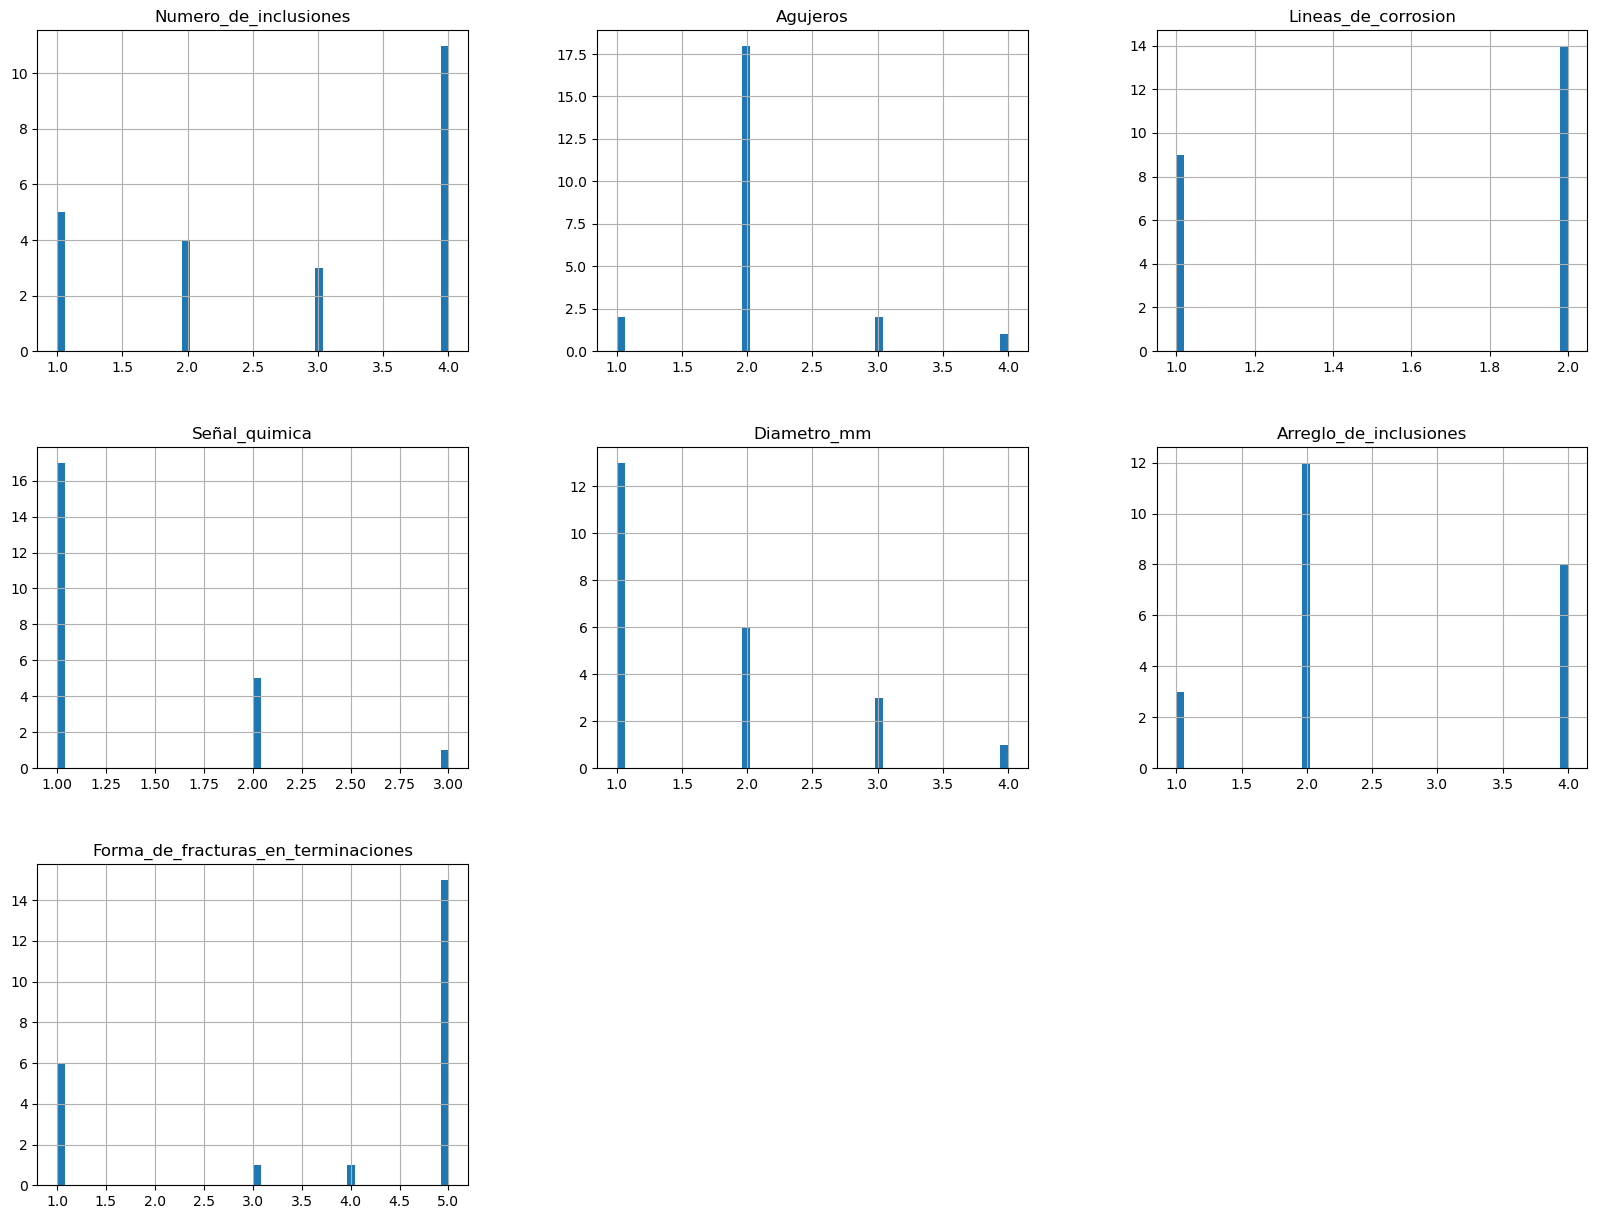

In [27]:
# Hacemos un histograma para cada columna
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

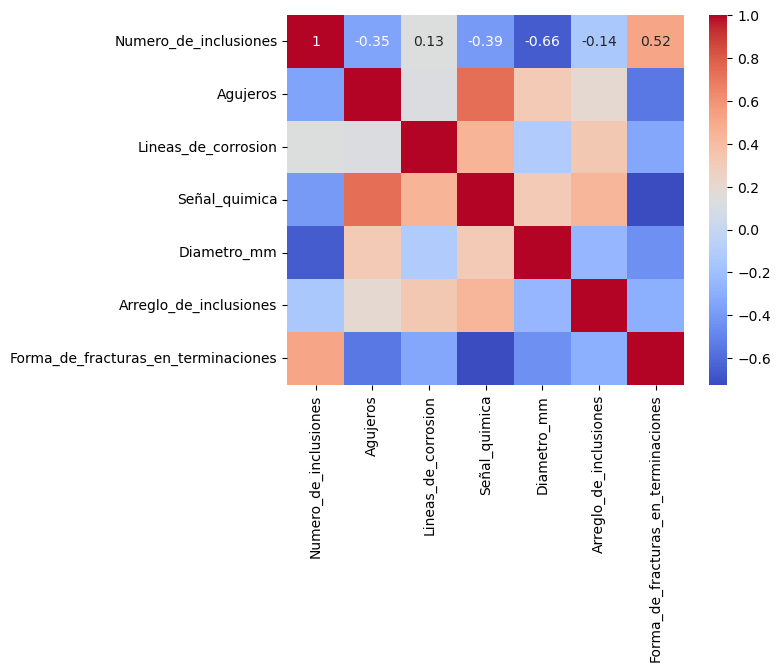

In [28]:
# Vemos si hay correlación entre las variables con un heatmap
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap='coolwarm')

In [29]:
df.to_csv('data/processed.csv')

In [30]:
from sklearn.metrics import pairwise_distances

In [31]:
pd.DataFrame(pairwise_distances(df.drop('Ejemplar', axis=1), metric='braycurtis'))

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000000,0.096774,0.161290,0.142857,0.200000,0.166667,0.200000,0.058824,0.354839,0.062500,...,0.407407,0.393939,0.000000,0.125000,0.379310,0.030303,0.000000,0.000000,0.030303,0.062500
1,0.096774,0.000000,0.266667,0.176471,0.310345,0.200000,0.310345,0.151515,0.266667,0.096774,...,0.384615,0.312500,0.096774,0.096774,0.285714,0.062500,0.096774,0.096774,0.062500,0.096774
2,0.161290,0.266667,0.000000,0.117647,0.172414,0.142857,0.172414,0.090909,0.266667,0.161290,...,0.384615,0.437500,0.161290,0.290323,0.214286,0.187500,0.161290,0.161290,0.187500,0.225806
3,0.142857,0.176471,0.117647,0.000000,0.212121,0.025641,0.212121,0.081081,0.176471,0.085714,...,0.400000,0.333333,0.142857,0.142857,0.250000,0.111111,0.142857,0.142857,0.111111,0.142857
4,0.200000,0.310345,0.172414,0.212121,0.000000,0.235294,0.000000,0.250000,0.379310,0.200000,...,0.200000,0.354839,0.200000,0.266667,0.407407,0.225806,0.200000,0.200000,0.225806,0.266667
5,0.166667,0.200000,0.142857,0.025641,0.235294,0.000000,0.235294,0.105263,0.142857,0.111111,...,0.419355,0.297297,0.166667,0.166667,0.212121,0.135135,0.166667,0.166667,0.135135,0.166667
6,0.200000,0.310345,0.172414,0.212121,0.000000,0.235294,0.000000,0.250000,0.379310,0.200000,...,0.200000,0.354839,0.200000,0.266667,0.407407,0.225806,0.200000,0.200000,0.225806,0.266667
7,0.058824,0.151515,0.090909,0.081081,0.250000,0.105263,0.250000,0.000000,0.272727,0.117647,...,0.448276,0.428571,0.058824,0.176471,0.290323,0.085714,0.058824,0.058824,0.085714,0.117647
8,0.354839,0.266667,0.266667,0.176471,0.379310,0.142857,0.379310,0.272727,0.000000,0.290323,...,0.307692,0.187500,0.354839,0.290323,0.071429,0.312500,0.354839,0.354839,0.312500,0.354839
9,0.062500,0.096774,0.161290,0.085714,0.200000,0.111111,0.200000,0.117647,0.290323,0.000000,...,0.407407,0.333333,0.062500,0.125000,0.310345,0.030303,0.062500,0.062500,0.030303,0.062500
